# (Prosoer Loan data Data Analysis)
## by (Mahmoud Attia)

## Preliminary Wrangling

> Loan data from prosper. More than 100 thousand loans and more than 80 variables for each loan. We need to dive in this treasure to see what the main factors are affecting the loan status and the credibility of each client. Reaching out these insights will help the lender institutions in making the right decisions.



In [69]:
# Removing warning messssages
import warnings

warnings.filterwarnings('ignore')

In [70]:
# importing all needed backages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set()

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [71]:
# uploading the data from csv file 
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> 113937 columns x 81 rows.

In [72]:
#structure of data frame 
df.shape

(113937, 81)

In [73]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [75]:
# check duplicates
df.duplicated().sum()

0

>no duplicated values

## As we see from the information, we have that the data need some cleaning. But before putting effort in the cleaning part we need to focus only on the most important attributes. My plan in doing so far is to find the most correlated factors in the data set.

In [76]:
# correlation Materix to eliminate the less important variables
corr_Matrix = df.corr()
corr_Matrix.style.background_gradient(cmap='coolwarm')

In [77]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is/are the main feature(s) of interest in your dataset?

> the most high correlated variables shown from the previous correlation matrix

In [78]:
# checking the number of columns after elimination
corr_cols= ['CreditGrade', 'LoanStatus', 'LoanNumber','LoanMonthsSinceOrigination', 'ListingNumber', 'BorrowerRate', 'BorrowerAPR', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'TotalTrades', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments' ]
len(corr_cols)

22

In [79]:
# New DataFrame
eliminated_df = df[corr_cols]
eliminated_df.head()

,CreditGrade,LoanStatus,LoanNumber,LoanMonthsSinceOrigination,ListingNumber,BorrowerRate,BorrowerAPR,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,ProsperRating (Alpha),ProsperScore,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,TotalTrades,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments
0,C,Completed,19141,78,193129,0.1580,0.16516,0.1380,NaN,NaN,...,NaN,NaN,5.0,4.0,12.0,1,11.0,NaN,NaN,NaN
1,NaN,Current,134815,0,1209647,0.0920,0.12016,0.0820,0.07960,0.0249,...,A,7.0,14.0,14.0,29.0,13,29.0,NaN,NaN,NaN
2,HR,Completed,6466,86,81716,0.2750,0.28269,0.2400,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,NaN,NaN
3,NaN,Current,77296,16,658116,0.0974,0.12528,0.0874,0.08490,0.0249,...,A,9.0,5.0,5.0,29.0,7,26.0,NaN,NaN,NaN
4,NaN,Current,102670,6,909464,0.2085,0.24614,0.1985,0.18316,0.0925,...,D,4.0,19.0,19.0,49.0,6,39.0,1.0,11.0,11.0


In [80]:
#repeating the same step for more elimination
corr_Matrix = eliminated_df.corr()
corr_Matrix.style.background_gradient(cmap='coolwarm')

,LoanNumber,LoanMonthsSinceOrigination,ListingNumber,BorrowerRate,BorrowerAPR,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,TotalTrades,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments
LoanNumber,1.000000,-0.944216,0.995095,-0.118721,-0.036269,-0.117959,-0.193878,-0.240823,-0.452731,0.207119,-0.120938,0.148043,0.198135,0.132088,0.232300,0.137612,0.181011,0.124499,0.124729
LoanMonthsSinceOrigination,-0.944216,1.000000,-0.939179,0.020420,-0.073773,0.019155,0.062443,0.201916,0.372727,-0.163213,0.177615,-0.120998,-0.169308,-0.134364,-0.213493,-0.140385,-0.200488,-0.171759,-0.169649
ListingNumber,0.995095,-0.939179,1.000000,-0.114391,-0.031520,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,0.145621,0.195707,0.130369,0.232109,0.134729,0.174834,0.131672,0.132063
BorrowerRate,-0.118721,0.020420,-0.114391,1.000000,0.989824,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,-0.097473,-0.105998,-0.005793,-0.125987,-0.048211,-0.049270,0.019217,0.006996
BorrowerAPR,-0.036269,-0.073773,-0.031520,0.989824,1.000000,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,-0.093481,-0.098860,0.002513,-0.110202,-0.041894,-0.041467,0.031399,0.018632
LenderYield,-0.117959,0.019155,-0.113544,0.999211,0.989329,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,-0.096318,-0.104790,-0.005470,-0.124609,-0.047249,-0.049514,0.018945,0.006724
EstimatedEffectiveYield,-0.193878,0.062443,-0.217721,0.895282,0.895635,0.895343,1.000000,0.798135,0.801568,-0.848394,-0.632003,-0.089472,-0.101529,-0.021227,-0.109961,-0.053520,-0.012418,0.002493,-0.011209
EstimatedLoss,-0.240823,0.201916,-0.239568,0.945297,0.949538,0.945308,0.798135,1.000000,0.591056,-0.964182,-0.673727,-0.101975,-0.117624,-0.028852,-0.132276,-0.068128,-0.040204,0.037584,0.027465
EstimatedReturn,-0.452731,0.372727,-0.461391,0.817670,0.794275,0.817654,0.801568,0.591056,1.000000,-0.659980,-0.383211,-0.103848,-0.124552,-0.036331,-0.130457,-0.065663,-0.065137,-0.026203,-0.037512
ProsperRating (numeric),0.207119,-0.163213,0.209200,-0.953105,-0.962151,-0.953119,-0.848394,-0.964182,-0.659980,1.000000,0.705221,0.092377,0.107543,0.027022,0.123652,0.067071,0.047455,-0.028316,-0.016737


In [81]:
# Cheking the number of eliminated columns
drop_col = ['LoanNumber','LoanMonthsSinceOrigination','ListingNumber','TotalProsperPaymentsBilled','OnTimeProsperPayments', 'TotalCreditLinespast7years','OpenRevolvingAccounts']
len(drop_col)

7

In [82]:
# the new struccture after elimination
elimn_df = eliminated_df.drop(drop_col, axis=1)
elimn_df.shape

(113937, 15)

In [83]:
elimn_df.head()

,CreditGrade,LoanStatus,BorrowerRate,BorrowerAPR,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,CurrentCreditLines,OpenCreditLines,TotalTrades,TotalProsperLoans
0,C,Completed,0.1580,0.16516,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,11.0,NaN
1,NaN,Current,0.0920,0.12016,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,14.0,14.0,29.0,NaN
2,HR,Completed,0.2750,0.28269,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Current,0.0974,0.12528,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,5.0,5.0,26.0,NaN
4,NaN,Current,0.2085,0.24614,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,19.0,19.0,39.0,1.0


In [84]:
elimn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CreditGrade              28953 non-null   object 
 1   LoanStatus               113937 non-null  object 
 2   BorrowerRate             113937 non-null  float64
 3   BorrowerAPR              113912 non-null  float64
 4   LenderYield              113937 non-null  float64
 5   EstimatedEffectiveYield  84853 non-null   float64
 6   EstimatedLoss            84853 non-null   float64
 7   EstimatedReturn          84853 non-null   float64
 8   ProsperRating (numeric)  84853 non-null   float64
 9   ProsperRating (Alpha)    84853 non-null   object 
 10  ProsperScore             84853 non-null   float64
 11  CurrentCreditLines       106333 non-null  float64
 12  OpenCreditLines          106333 non-null  float64
 13  TotalTrades              106393 non-null  float64
 14  Tota

### Depending on what I am asking about, will make my first steps in the cleaning process.

> What are the variables impact on Loan status?


> What determine the credit Grade?


> What determine the APR and the interest rate?

In [85]:
# counting the missing values 
elimn_df.isna().sum()

CreditGrade                84984
LoanStatus                     0
BorrowerRate                   0
BorrowerAPR                   25
LenderYield                    0
EstimatedEffectiveYield    29084
EstimatedLoss              29084
EstimatedReturn            29084
ProsperRating (numeric)    29084
ProsperRating (Alpha)      29084
ProsperScore               29084
CurrentCreditLines          7604
OpenCreditLines             7604
TotalTrades                 7544
TotalProsperLoans          91852
dtype: int64

### The sum of missing values in the credit grade and Total loans are enough to drop these two columns.

In [86]:
# droping the 'CreditGrade','TotalProsperLoans' columns
elimn_df.drop(['CreditGrade','TotalProsperLoans'], axis=1, inplace=True)
# last structure
elimn_df.shape

(113937, 13)

### The number of missed data is consistent which could mean that these values fall on the same rows. Depending on this guess I will take a copy from the data frame before dropping NaNs.

In [87]:
# taking copy from the data frame to work on it
df_copy = elimn_df.copy()
df_copy.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LoanStatus               113937 non-null  object 
 1   BorrowerRate             113937 non-null  float64
 2   BorrowerAPR              113912 non-null  float64
 3   LenderYield              113937 non-null  float64
 4   EstimatedEffectiveYield  84853 non-null   float64
 5   EstimatedLoss            84853 non-null   float64
 6   EstimatedReturn          84853 non-null   float64
 7   ProsperRating (numeric)  84853 non-null   float64
 8   ProsperRating (Alpha)    84853 non-null   object 
 9   ProsperScore             84853 non-null   float64
 10  CurrentCreditLines       106333 non-null  float64
 11  OpenCreditLines          106333 non-null  float64
 12  TotalTrades              106393 non-null  float64
dtypes: float64(11), object(2)
memory usage: 11.3+ MB


In [88]:
# droping NaN values
df_copy.dropna(inplace=True)
df.shape

(113937, 81)

In [89]:
# rechecking the structure of the data frame 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LoanStatus               84853 non-null  object 
 1   BorrowerRate             84853 non-null  float64
 2   BorrowerAPR              84853 non-null  float64
 3   LenderYield              84853 non-null  float64
 4   EstimatedEffectiveYield  84853 non-null  float64
 5   EstimatedLoss            84853 non-null  float64
 6   EstimatedReturn          84853 non-null  float64
 7   ProsperRating (numeric)  84853 non-null  float64
 8   ProsperRating (Alpha)    84853 non-null  object 
 9   ProsperScore             84853 non-null  float64
 10  CurrentCreditLines       84853 non-null  float64
 11  OpenCreditLines          84853 non-null  float64
 12  TotalTrades              84853 non-null  float64
dtypes: float64(11), object(2)
memory usage: 9.1+ MB


In [90]:
# rechecking the missing values
df_copy.isna().sum()

LoanStatus                 0
BorrowerRate               0
BorrowerAPR                0
LenderYield                0
EstimatedEffectiveYield    0
EstimatedLoss              0
EstimatedReturn            0
ProsperRating (numeric)    0
ProsperRating (Alpha)      0
ProsperScore               0
CurrentCreditLines         0
OpenCreditLines            0
TotalTrades                0
dtype: int64

In [91]:
# the latest cleaned data 
# ready for exploration
df = df_copy.copy()
df.head(5)

,LoanStatus,BorrowerRate,BorrowerAPR,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,CurrentCreditLines,OpenCreditLines,TotalTrades
1,Current,0.0920,0.12016,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,14.0,14.0,29.0
3,Current,0.0974,0.12528,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,5.0,5.0,26.0
4,Current,0.2085,0.24614,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,19.0,19.0,39.0
5,Current,0.1314,0.15425,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,21.0,17.0,47.0
6,Current,0.2712,0.31032,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,10.0,7.0,16.0


In [92]:
# Alpha and numeric are same so I drop on of them
df.drop(['ProsperRating (numeric)'], axis=1, inplace=True)

In [93]:
# quick statistic describtion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BorrowerRate,84853.0,0.196022,0.074631,0.04000,0.13590,0.18750,0.25740,0.36000
BorrowerAPR,84853.0,0.226658,0.079916,0.04583,0.16328,0.21945,0.29254,0.42395
LenderYield,84853.0,0.186017,0.074631,0.03000,0.12590,0.17750,0.24740,0.34000
EstimatedEffectiveYield,84853.0,0.168661,0.068467,-0.18270,0.11567,0.16150,0.22430,0.31990
EstimatedLoss,84853.0,0.080306,0.046764,0.00490,0.04240,0.07240,0.11200,0.36600
EstimatedReturn,84853.0,0.096068,0.030403,-0.18270,0.07408,0.09170,0.11660,0.28370
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.00000,6.00000,8.00000,11.00000
CurrentCreditLines,84853.0,10.508032,5.317401,0.00000,7.00000,10.00000,13.00000,59.00000
OpenCreditLines,84853.0,9.528644,4.931802,0.00000,6.00000,9.00000,12.00000,54.00000
TotalTrades,84853.0,23.928571,11.607638,1.00000,16.00000,23.00000,31.00000,122.00000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Discuss the distribution(s) of your variable(s) of interest. 

> We need to investigate the reasons behind this amount of charged-off and defaulted loans. 6341 cases are not a small number of loans in financial terms.

## categorical data  

## Bar chart showing the loan Status Distribution

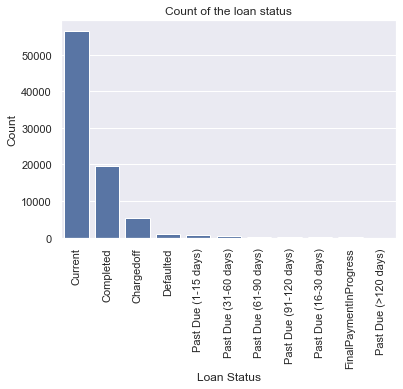

In [94]:
# barchart for loan status
freq = df['LoanStatus'].value_counts()

base_color = sb.color_palette()[0]

sb.countplot(data=df, x='LoanStatus', color=base_color, order=freq.index);
plt.xticks(rotation=90);
plt.xlabel('Loan Status');
plt.ylabel('Count');
plt.title('Count of the loan status');

In [95]:
# the number of defaulted and chargedoff loans
df.query('LoanStatus == "Chargedoff"').count()['LoanStatus'] + df.query('LoanStatus == "Defaulted"').count()['LoanStatus']

6341

> We need to investigate the reasons behind this amount of charged-off and defaulted loans. 6341 cases are not a small number of loans in financial terms.

## Bar chart showing the distribution of each Rate.

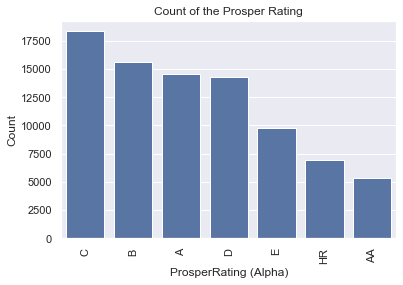

In [96]:
#barchart for prosper ratings
freq = df['ProsperRating (Alpha)'].value_counts()

base_color = sb.color_palette()[0]

sb.countplot(data=df, x='ProsperRating (Alpha)', color=base_color, order=freq.index);
plt.xticks(rotation=90);
plt.xlabel('ProsperRating (Alpha)');
plt.ylabel('Count');
plt.title('Count of the Prosper Rating');

>The highest in the creditworthiness are the lowest amount and vice versa.

## Numerical Data

In [97]:
# Histo function is for all repetitive histogram functions
def histo(data, x, binsize, xlabel, title):
    bins = np.arange(df[x].min(), df[x].max()+ binsize, binsize)
    plt.hist(data=data, x=x, bins=bins)
    plt.xlabel(xlabel)
    plt.title(title)
    

## Histograms for the interest and APR rates.

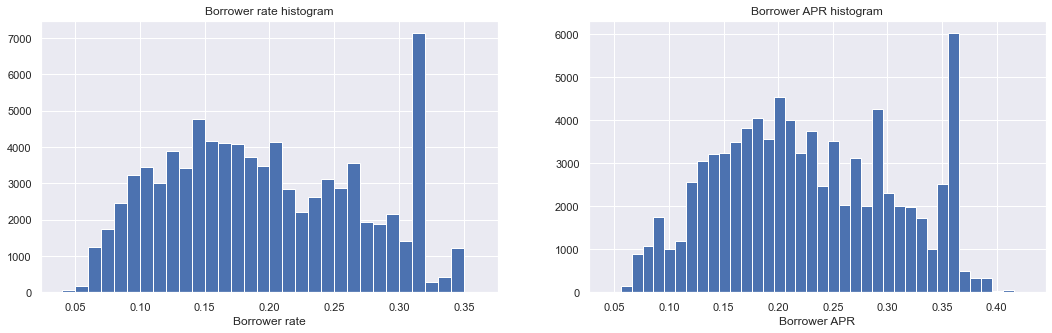

In [98]:
# histograms for the intersest and APR rates
plt.figure(figsize=[18, 5])

plt.subplot(1,2,1)
histo(data=df, x='BorrowerRate', binsize=0.01, xlabel='Borrower rate', title= 'Borrower rate histogram'  )


plt.subplot(1,2,2)
histo(data=df, x='BorrowerAPR', binsize=0.01, xlabel='Borrower APR', title= 'Borrower APR histogram'  )





> The borrower rates look normally distributed except the values fall on the bin 0.3 are extremely large.  

## Histograms for both lender and estimated effective yields.

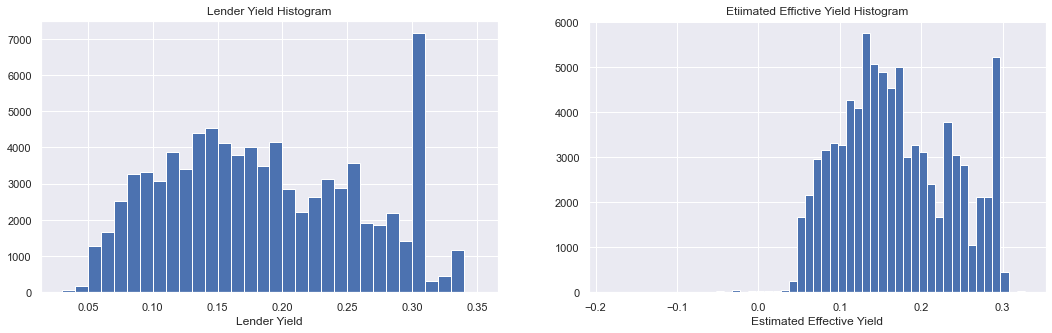

In [99]:
# histogramm for lender and estimated effictive yields 
plt.figure(figsize=[18, 5])

plt.subplot(1,2,1)
histo(data=df, x='LenderYield', binsize=0.01, xlabel='Lender Yield', title= 'Lender Yield Histogram'  )

plt.subplot(1,2,2)
histo(data=df, x='EstimatedEffectiveYield', binsize=0.01, xlabel='Estimated Effective Yield', title= 'Etiimated Effictive Yield Histogram'  )


> The same observation as before still we have to understand why the values under bin 0.3 is extremely large.

## Histgrams for both estimated return and Estimated loss.

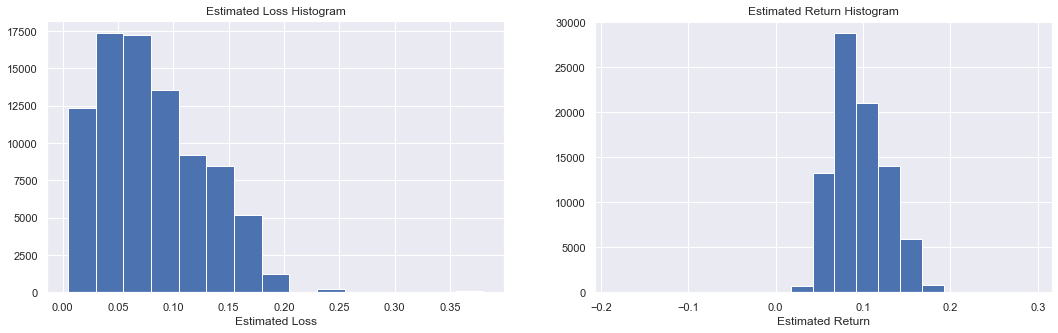

In [100]:
# Histgrams for both estimated return and Estimated loss.
plt.figure(figsize=[18, 5])

plt.subplot(1,2,1)
histo(data=df, x='EstimatedLoss', binsize=0.025, xlabel='Estimated Loss', title= 'Estimated Loss Histogram'  )
;

plt.subplot(1,2,2)
histo(data=df, x='EstimatedReturn', binsize=0.025, xlabel='Estimated Return', title= 'Estimated Return Histogram'  )


> From the distribution of estimatied loss we see the data is right skewed, but the estimated return graph looks pretty normal distributed.

In [101]:
# unique values of prosper score
df['ProsperScore'].unique()

array([ 7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

> From what we see from the output of the unique data of ProsperScore, we could suggest to deal with as ordinal data.

## Disribution of borrower score.
> The majority of borrowers score lie between 4:8 in a bell curve shape with a small pikes.


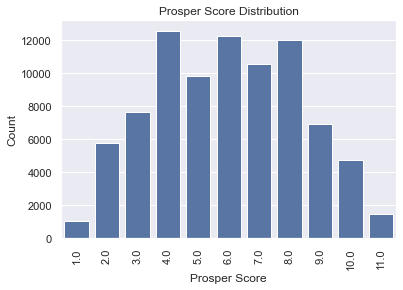

In [102]:
# the distribution of the client score

base_color = sb.color_palette()[0]

sb.countplot(data=df, x='ProsperScore', color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Prosper Score');
plt.ylabel('Count');
plt.title('Prosper Score Distribution');

> The majority of borrowers score lie between 4:8 in a bell curve shape with a small pikes.

## Distribution of all credit lines and total trades.

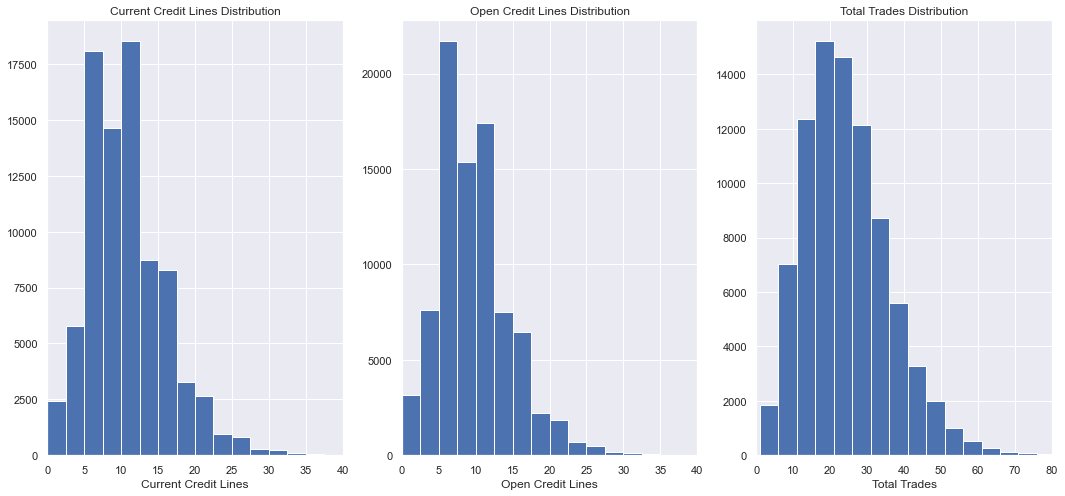

In [103]:
#Distribution of all credit lines and total trades.
plt.figure(figsize=[18, 8])

plt.subplot(1,3,1)
histo(data=df, x='CurrentCreditLines', binsize=2.5, xlabel='Current Credit Lines', title= 'Current Credit Lines Distribution')
;
plt.xlim(0,40);


plt.subplot(1,3,2)
histo(data=df, x='OpenCreditLines', binsize=2.5, xlabel='Open Credit Lines', title= 'Open Credit Lines Distribution')
;
plt.xlim(0,40);


plt.subplot(1,3,3)
histo(data=df, x='TotalTrades', binsize=5, xlabel='Total Trades', title= 'Total Trades Distribution')
;
plt.xlim(0,80);


> The distribution of the opened credits are right skewed with some pikes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [104]:
df.columns

Index(['LoanStatus', 'BorrowerRate', 'BorrowerAPR', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (Alpha)', 'ProsperScore', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalTrades'],
      dtype='object')

In [105]:
# seperating numeric and categorical values
numeric_vars = ['BorrowerRate', 'BorrowerAPR', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'CurrentCreditLines', 'OpenCreditLines', 'TotalTrades']
categoric_vars = ['LoanStatus', 'ProsperRating (Alpha)', 'ProsperScore']
# checking the number of columns 
len(numeric_vars) + len(categoric_vars)

12

## Correlation map to show the strength of correlation between the variables in one map.

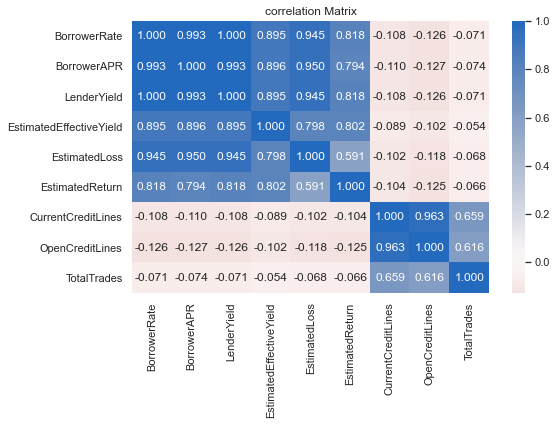

In [106]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center=0)
plt.title('correlation Matrix')
plt.show()

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The heat map shows that many variables are highly correlated where the correlation factor is more than 0.7 in many cases. Even close to one.
### &
> THe higly correlated variables are located in two different blocks, whic could make the investigation much more easier.

In [107]:
# seperating the data to two high correlated variables blocks
block_1 = ['BorrowerRate', 'BorrowerAPR', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']
block_2 = ['CurrentCreditLines', 'OpenCreditLines', 'TotalTrades']

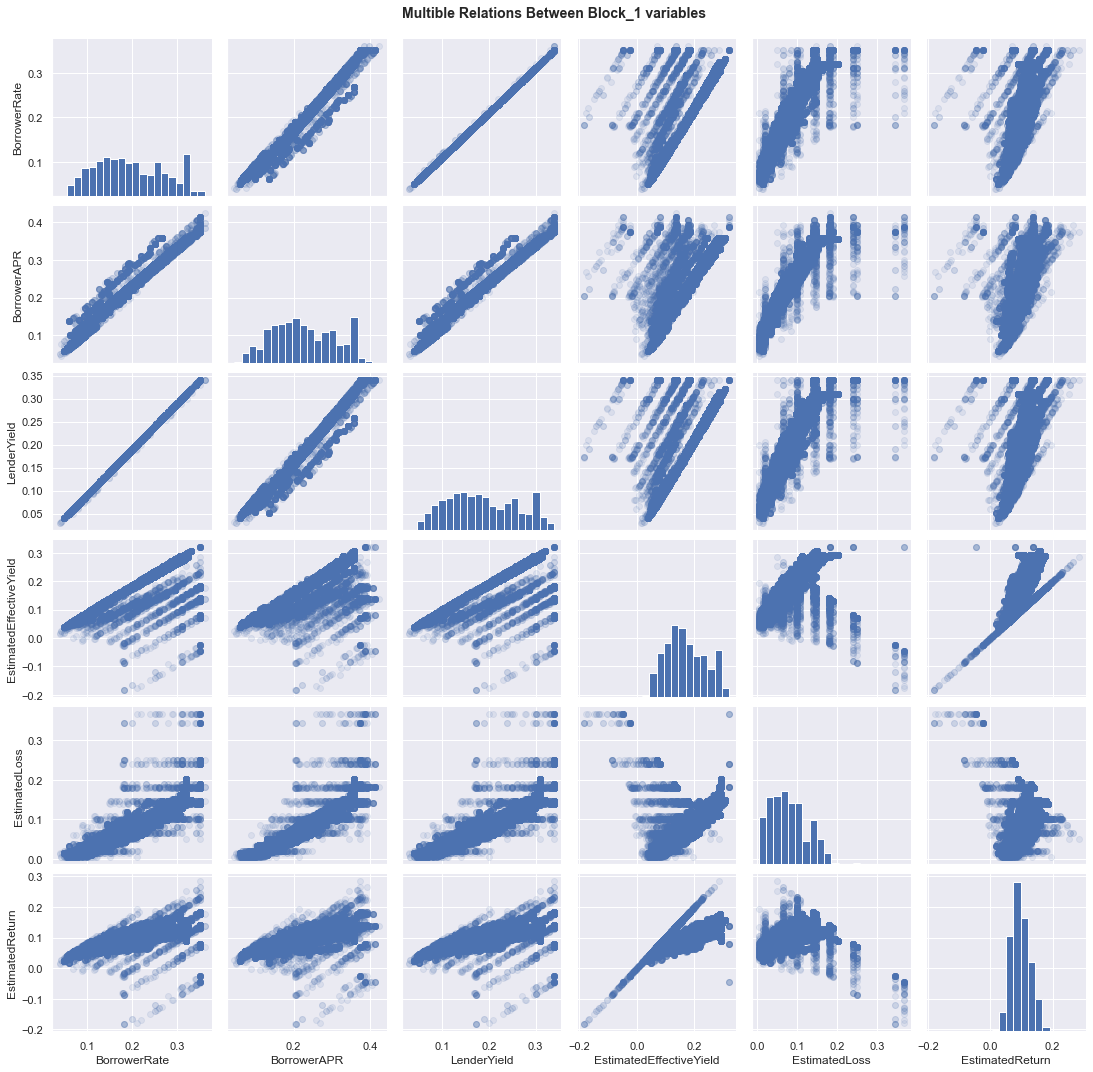

In [108]:
# scatter block for block_1
g = sb.PairGrid(data = df, vars = block_1)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha= 0.1);

# Addig a main title
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Multible Relations Between Block_1 variables',fontsize = 14, weight = "bold")
plt.show()

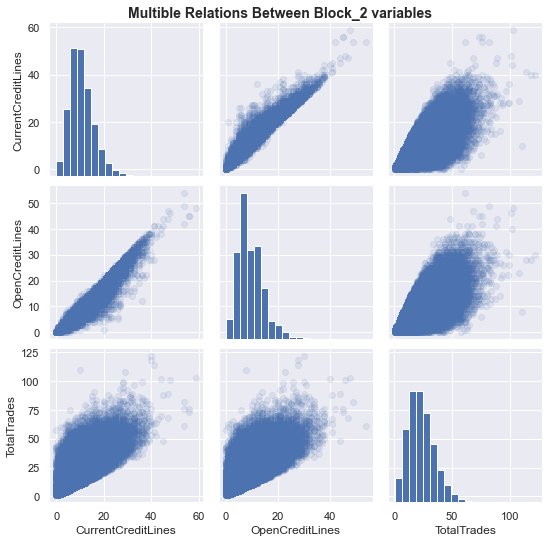

In [109]:
# scatter block for block_2
g = sb.PairGrid(data = df, vars = block_2)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha=0.1);

# Addig a main title
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Multible Relations Between Block_2 variables',fontsize = 14, weight = "bold")
plt.show()

> Ther are some linear relation ships like the relation between (borrwer rate vs  lender yield) & (borrower rate vs borroer APR) & (estimated effictive yield vs estimation return) & (open curedit lines vs currnt credit lines).

## Plotting some numerical variables against categorical ones.

## Box plots between the APR vs. the loan status and Score and Rating.

### Were there any interesting or surprising interactions between features?
> The highest median and the highest maximum APR are with the difaulted and Charged- off loan Status. 
### &
> The lowest  Median of APR are with AA rank and A rank. 
### &
> The median valus of The APR goes down gradually from 1.0 to 11.0 Prosper score.

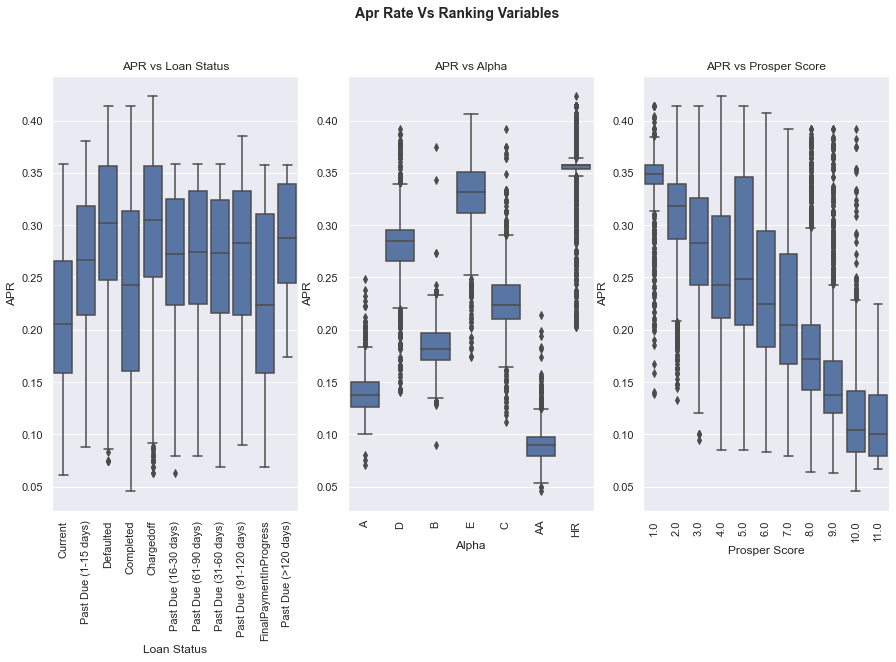

In [110]:
# bivariate plots of APR vs. Loan Status, Alpha, Prosper Score
plt.figure(figsize=[15,8])
base_color= sb.color_palette()[0]

plt.subplot(1,3,1)
sb.boxplot(data=df, x='LoanStatus', y='BorrowerAPR', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('APR');
plt.xlabel('Loan Status');
plt.title('APR vs Loan Status');

plt.subplot(1,3,2)
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('APR');
plt.xlabel('Alpha');
plt.title('APR vs Alpha');

plt.subplot(1,3,3)
sb.boxplot(data=df, x='ProsperScore', y='BorrowerAPR', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('APR');
plt.xlabel('Prosper Score');
plt.title('APR vs Prosper Score');

# mian title
plt.suptitle("APR rate vs Ranking variables".title(), y = 1,
            fontsize = 14, weight = "bold");



### The median of the total trades are quite stable however the change in the credit worthiness.

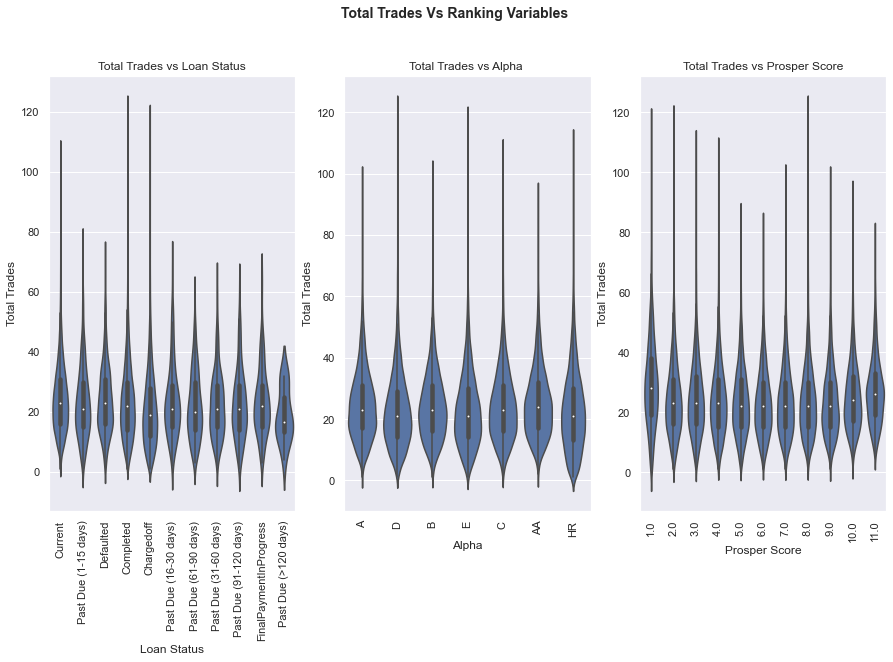

In [111]:
# bivariate plots of TotalTrades vs. Loan Status, Alpha, Prosper Score
plt.figure(figsize=[15,8])
base_color= sb.color_palette()[0]
# Plotting violin plots
plt.subplot(1,3,1)
sb.violinplot(data=df, x='LoanStatus', y='TotalTrades', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('Total Trades');
plt.xlabel('Loan Status');
plt.title('Total Trades vs Loan Status');

plt.subplot(1,3,2)
sb.violinplot(data=df, x='ProsperRating (Alpha)', y='TotalTrades', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('Total Trades');
plt.xlabel('Alpha');
plt.title('Total Trades vs Alpha ');

plt.subplot(1,3,3)
sb.violinplot(data=df, x='ProsperScore', y='TotalTrades', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('Total Trades');
plt.xlabel('Prosper Score');
plt.title('Total Trades vs Prosper Score');


# mian title
plt.suptitle("Total Trades vs Ranking variables".title(), y = 1,
            fontsize = 14, weight = "bold");



### Also the distibution of the total trades are aproximatelly evenly distributed through the borrower rank.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## The relation between the APR vs the  score among different loan status using box plots for staus.
## Whenever The interest rate increase the probability of getting defaulted increase.

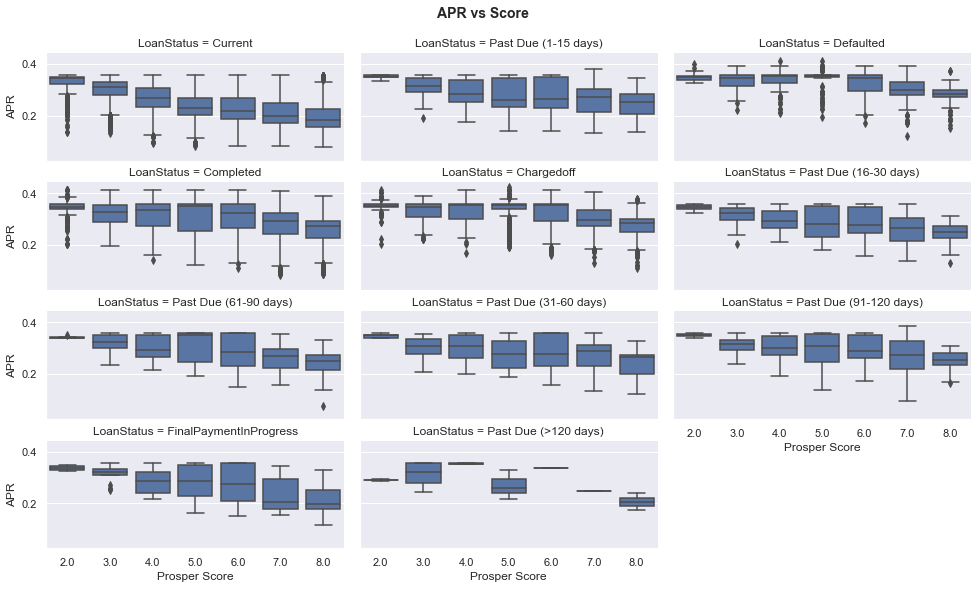

In [112]:
# facetgrid to show the relation between the score and APR among different loan status using box  plots
g = sb.FacetGrid(data = df,  col = 'LoanStatus', col_wrap=3, height = 4,  margin_titles=True)
g.map(sb.boxplot, 'ProsperScore', 'BorrowerAPR')
 ## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);
g.set_xlabels('Prosper Score')
g.set_ylabels('APR')

# Addig a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('APR vs Score',fontsize = 14, weight = "bold")
plt.show()

> We see here from the graphs of the Defaulted and charged-off status the APR has a high values however the score and most of the low values are just outliers due to the short distance between the interquartiles. 

## Scatter plot to show the linear behaviour we have between our variables.
>The moderate rating is the highest return on average. However, the highest return comes with the highest interest, most likely the high interest gets defaulted.

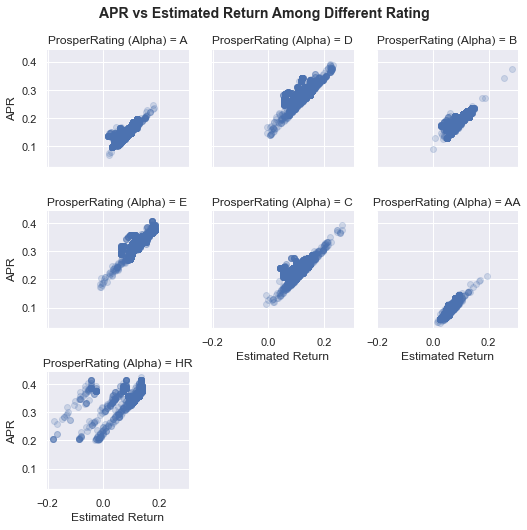

In [113]:
## facetgrid to show the relation between the Estimated return and APR among different Ratings using scatter plots
g = sb.FacetGrid(data = df,  col ='ProsperRating (Alpha)', col_wrap=3, height = 2.5, margin_titles = True) 
g.map(plt.scatter, 'EstimatedReturn', 'BorrowerAPR', alpha= 0.2)
g.set_xlabels('Estimated Return')
g.set_ylabels('APR')


# Addig a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('APR vs Estimated Return Among Different Rating',fontsize = 14, weight = "bold")
plt.show()

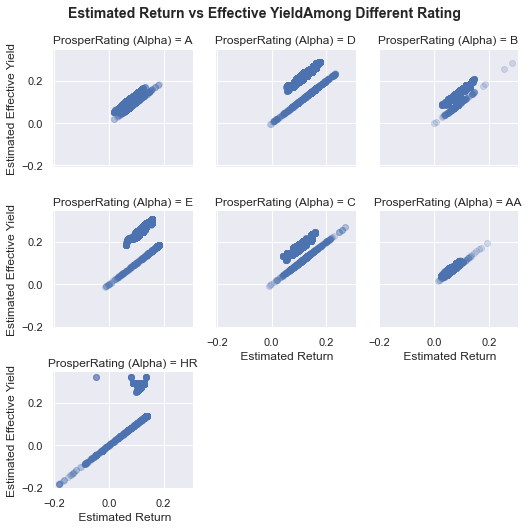

In [114]:
# facetgrid to show the relation between the Estimated return and Estimated Effective Yield
# among different Ratings using scatter plots

g = sb.FacetGrid(data = df,  col ='ProsperRating (Alpha)', col_wrap=3, height = 2.5, margin_titles = True) 
g.map(plt.scatter, 'EstimatedReturn', 'EstimatedEffectiveYield',alpha=0.2)
g.set_xlabels(' Estimated Return')
g.set_ylabels('Estimated Effective Yield')

# Addig a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Estimated Return vs Effective YieldAmong Different Rating',fontsize = 14, weight = "bold")
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Linear behaviour between the Estimated Return vs Estimated Effective Yield, and between the Estimated Return vs APR under all different conditions of rating.

In [115]:
!jupyter nbconvert exploration_template.ipynb --to slides --no-input


[NbConvertApp] Converting notebook exploration_template.ipynb to slides
[NbConvertApp] Writing 676839 bytes to exploration_template.slides.html
